# Autoencoder - MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, optimizers
from keras.datasets import mnist
from keras.models import Model, Sequential
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
(xTrain, _), (xTest, _) = mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [3]:
X=np.concatenate((xTrain,xTest))
xTrain, xTest = train_test_split(X, test_size=0.33)
print(xTrain.shape)
print(xTest.shape)

(46900, 28, 28)
(23100, 28, 28)


In [4]:
xTrain=xTrain.astype('float32')/255
xTest=xTest.astype('float32')/255

In [5]:
xTrain=xTrain.reshape(xTrain.shape[0], -1)
xTest=xTest.reshape(xTest.shape[0], -1)

## Auto Encoder Class

In [6]:
class autoencoder():
  def __init__(self, codeDim):
    self.inputImg=Input(shape=(784,), name='input')
    self.createModel(codeDim)

  def createModel(self, codeDim):
    encoder=Sequential(
        [
        Input(shape=(784,)),
        layers.Dense(512, activation='relu', name='encLayer1'),
        layers.Dense(256, activation='relu', name='encLayer2'),
        layers.Dense(128, activation='relu', name='encLayer3'),
        layers.Dense(codeDim, activation='linear', name='encLayer4')      
        ]
    )
    self.encoder=encoder

    decoder=Sequential(
        [
        Input(shape=(codeDim,), name='input'),
        layers.Dense(128, activation='relu', name='decLayer1'),
        layers.Dense(256, activation='relu', name='decLayer2'),
        layers.Dense(512, activation='relu', name='decLayer3'),
        layers.Dense(784, activation='sigmoid', name='decLayer4'),
        #  layers.Reshape((28,28))      
        ]
    )
    self.decoder=decoder
    latentVector=self.encoder(self.inputImg)
    reconstructedImg=self.decoder(latentVector)
    self.model=Model(inputs=self.inputImg, outputs=reconstructedImg)
    return self.model

  def compileFunc(self, lossFunc, optim):
    self.model.compile(
        loss=lossFunc, 
        optimizer=optim
    )
  def fit(self, xTrain, xTest, batchSize, epoch):
    history=self.model.fit(xTrain, xTrain, batch_size=batchSize, epochs=epoch, verbose=0, validation_data=(xTest, xTest))
    return history

  def plotReconstructed(self, xTest):
    latentVector=self.encoder.predict(xTest)
    reconstructedImg=self.decoder.predict(latentVector)
    n=10
    plt.figure(figsize=(30,9))
    for i in range(n):
      plt.subplot(3,n,i+1)
      plt.imshow(xTest[i].reshape(28,28))
      plt.axis('off')
      plt.title('Input Image (28X28)')

      plt.subplot(3,n,i+1+n)
      plt.imshow(latentVector[i].reshape(8,8))
      plt.axis('off')
      plt.title('Encoded Image ()')

      plt.subplot(3,n,i+1+2*n)
      plt.imshow(reconstructedImg[i].reshape(28,28))
      plt.axis('off')

  plt.show()
  
def saveModel(fileName):
  self.model.save(fileName)

def plotAccLoss(history, epochs, codeDim, optim):
  testRecLoss=history.history['val_loss'][-1]
  print(f"\n\nTest Reconstruction Loss: {testRecLoss}")
  plt.figure(figsize=(5,5))
  plt.plot(list(range(1, epochs+1)), history.history['loss'], label='Training Loss')
  plt.legend()
  plt.title(optim+' ; number of hidden neurons = '+str(codeDim))
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.show()
  return testRecLoss

def plotLossVsNeurons(codeDimList, reconLoss):
  plt.figure(figsize=(5,5))
  plt.plot(codeDimList, reconLoss)
  plt.title('Neurons vs Reconstruction Loss')
  plt.xlabel('Number of Neurons')
  plt.ylabel('Loss')
  plt.show()

codeDimList=[16,32,48,64,96]
batchSize=128
epochs=10

## Adam



Test Reconstruction Loss: 0.02207586169242859


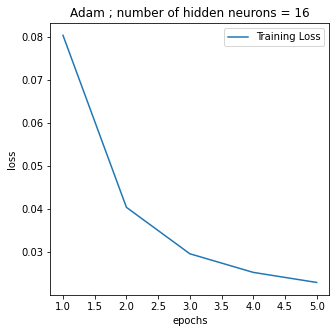



Test Reconstruction Loss: 0.017490847036242485


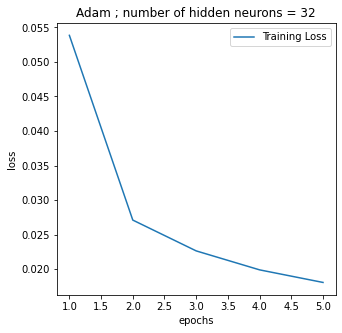



Test Reconstruction Loss: 0.017382822930812836


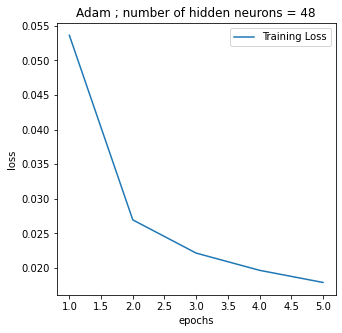



Test Reconstruction Loss: 0.0152035653591156


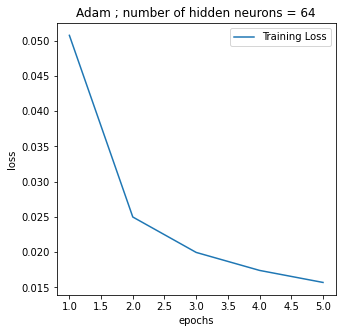



Test Reconstruction Loss: 0.015477605164051056


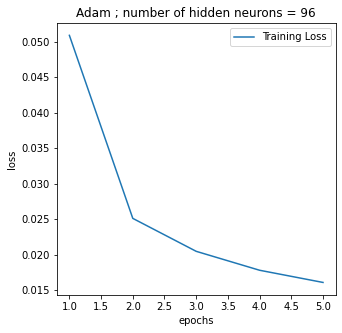

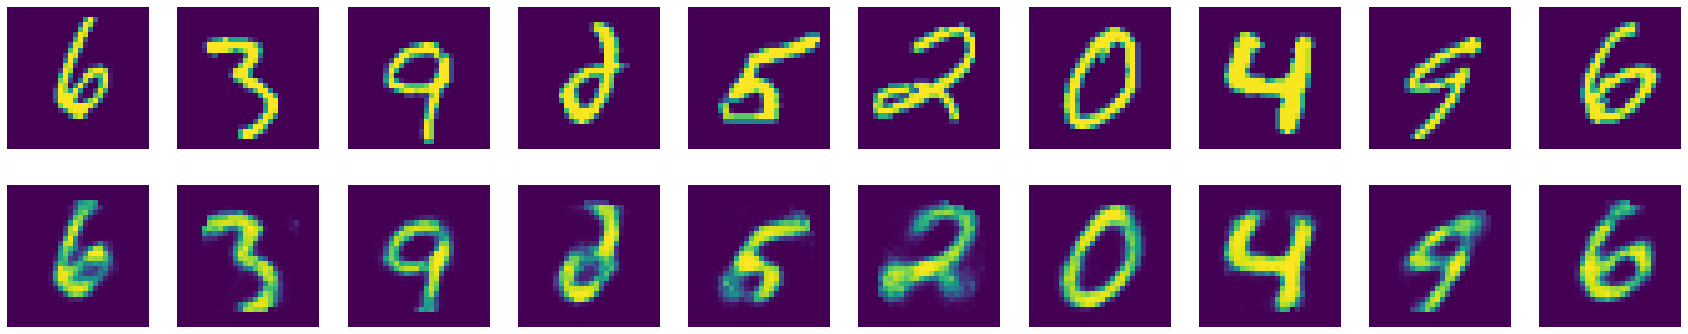

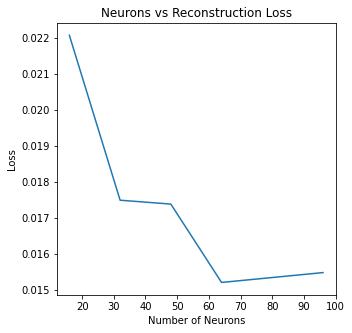

In [ ]:
keras.backend.clear_session()
loss='mean_squared_error'
optim=optimizers.Adam(learning_rate=0.0001)

epochs=5
reconLoss=[]

for codeDim in codeDimList:
  ae=autoencoder(codeDim)
  ae.compileFunc(loss, optim)
  history=ae.fit(xTrain, xTest, batchSize, epochs)
  reconLoss.append(plotAccLoss(history, epochs, codeDim, 'Adam'))

ae.plotReconstructed(xTest)
plotLossVsNeurons(codeDimList, reconLoss)

## RMS Prop



Test Reconstruction Loss: 0.017404038459062576


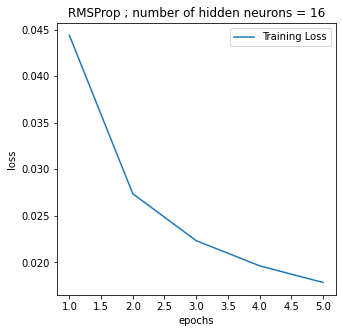



Test Reconstruction Loss: 0.01593422330915928


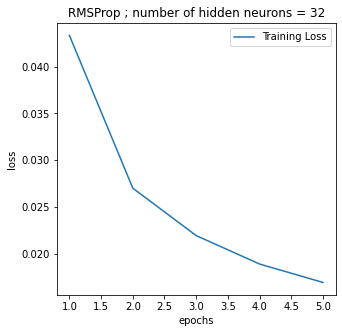



Test Reconstruction Loss: 0.01589871384203434


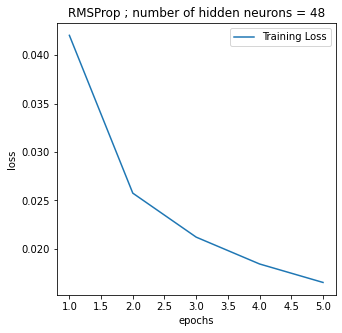



Test Reconstruction Loss: 0.015660982578992844


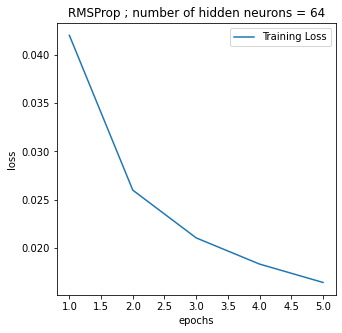



Test Reconstruction Loss: 0.01544113364070654


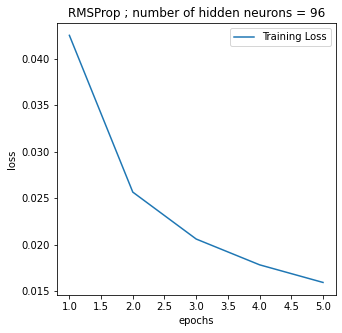

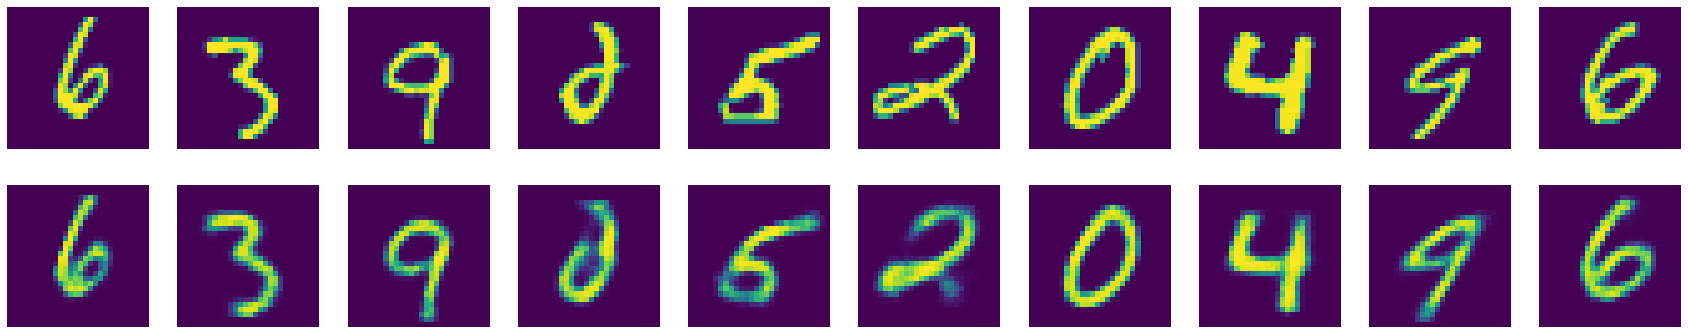

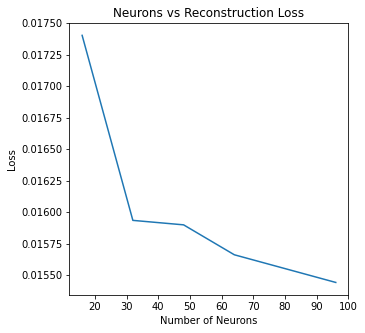

In [ ]:
loss='mean_squared_error'
optim=optimizers.RMSprop(learning_rate=0.001)

epochs=5
reconLoss=[]

for codeDim in codeDimList:
  keras.backend.clear_session()
  ae=autoencoder(codeDim)
  ae.compileFunc(loss, optim)
  history=ae.fit(xTrain, xTest, batchSize, epochs)
  reconLoss.append(plotAccLoss(history, epochs, codeDim, 'RMSProp'))

ae.plotReconstructed(xTest)
plotLossVsNeurons(codeDimList, reconLoss)

## SGD with Momentum



Test Reconstruction Loss: 0.015639448538422585


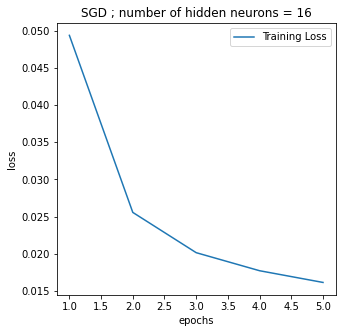



Test Reconstruction Loss: 0.012501013465225697


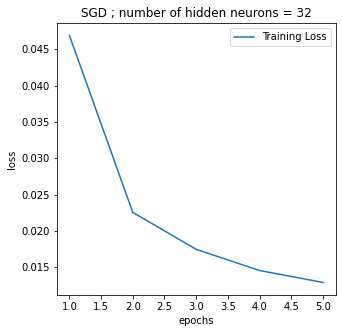



Test Reconstruction Loss: 0.012334764935076237


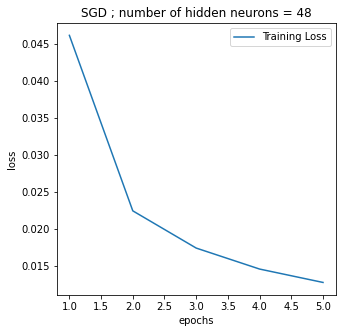



Test Reconstruction Loss: 0.0113527225330472


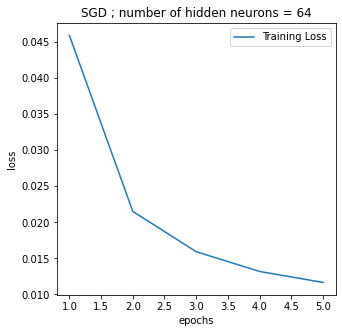



Test Reconstruction Loss: 0.010643190704286098


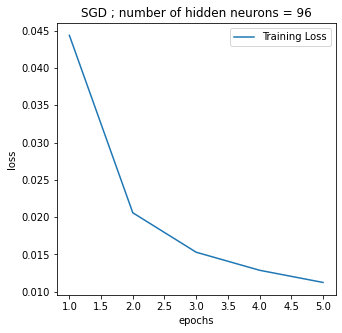

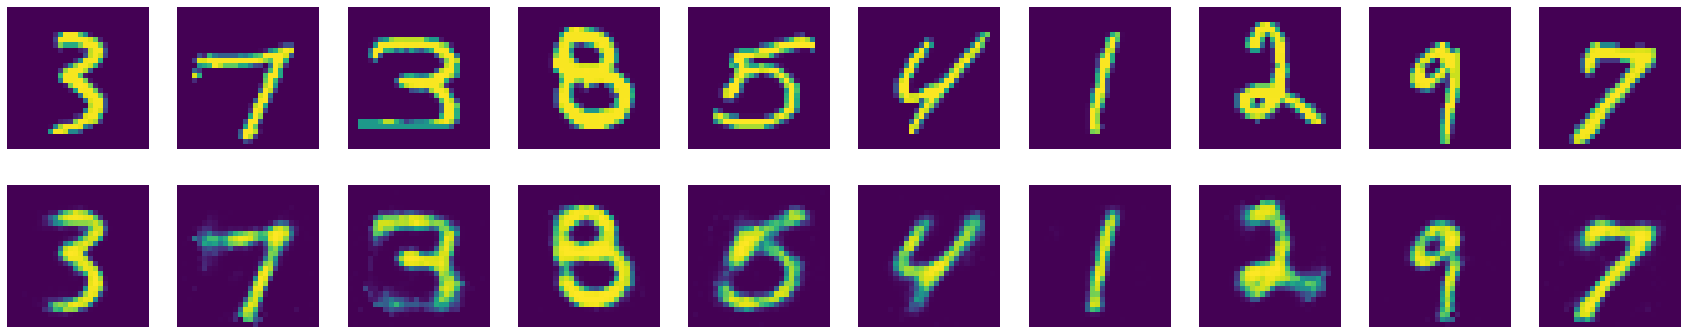

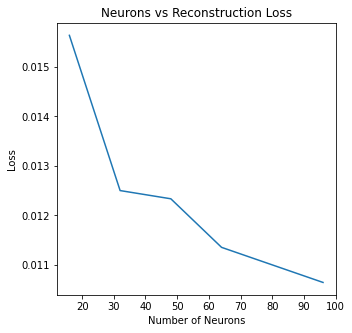

In [ ]:
keras.backend.clear_session()

loss='mean_squared_error'
optim=optimizers.SGD(learning_rate=0.01, momentum=0.9)

batchSize=1
epochs=5
reconLoss=[]

for codeDim in codeDimList:
  ae=autoencoder(codeDim)
  ae.compileFunc(loss, optim)
  history=ae.fit(xTrain, xTest, batchSize, epochs)
  reconLoss.append(plotAccLoss(history, epochs, codeDim, 'SGD'))

ae.saveModel('bestModel.h5')
ae.plotReconstructed(xTest)
plotLossVsNeurons(codeDimList, reconLoss)

## SGD w/o Momentum



Test Reconstruction Loss: 0.045114122331142426


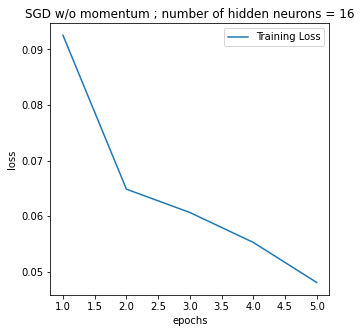



Test Reconstruction Loss: 0.03800090402364731


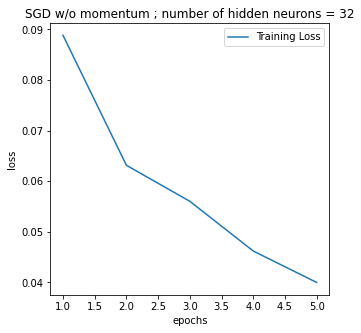



Test Reconstruction Loss: 0.03764912858605385


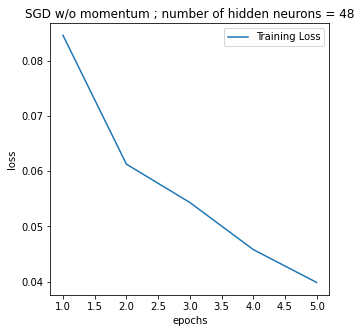



Test Reconstruction Loss: 0.03781988099217415


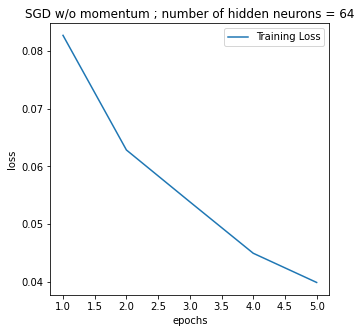



Test Reconstruction Loss: 0.03435478359460831


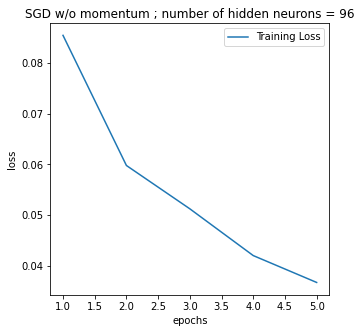

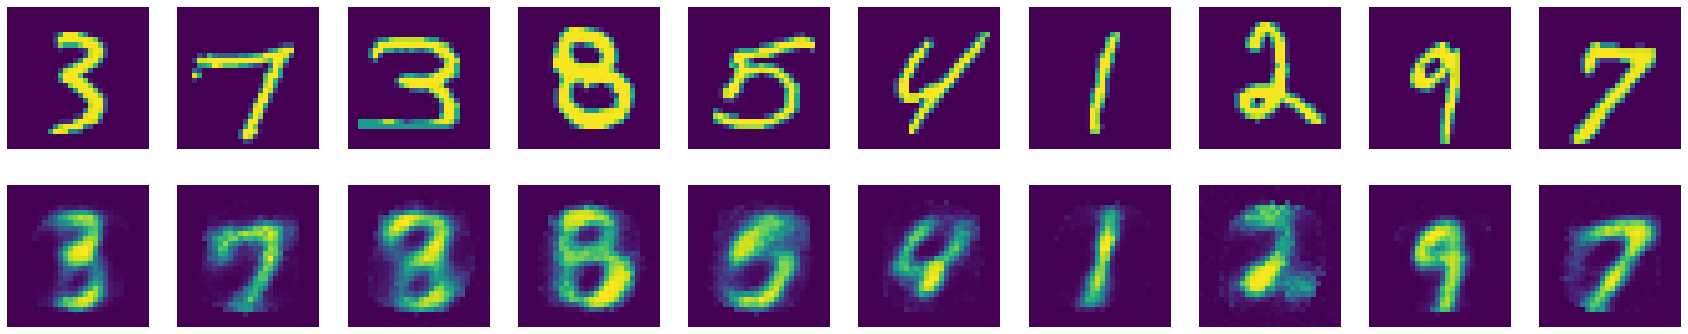

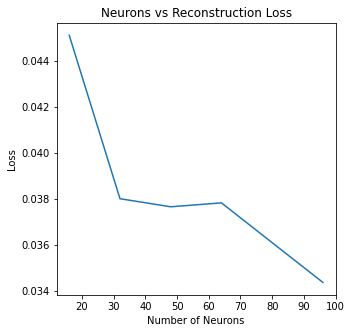

In [ ]:
keras.backend.clear_session()

loss='mean_squared_error'
optim=optimizers.SGD(learning_rate=0.01)

batchSize=1
epochs=5
reconLoss=[]

for codeDim in codeDimList:
  ae=autoencoder(codeDim)
  ae.compileFunc(loss, optim)
  history=ae.fit(xTrain, xTest, batchSize, epochs)
  reconLoss.append(plotAccLoss(history, epochs, codeDim, 'SGD w/o momentum'))

ae.plotReconstructed(xTest)
plotLossVsNeurons(codeDimList, reconLoss)



Test Reconstruction Loss: 0.11350735276937485


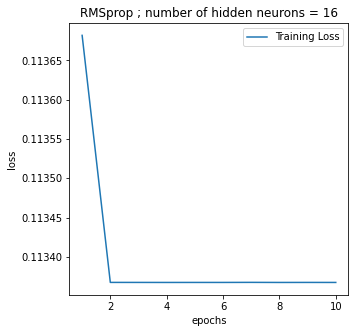



Test Reconstruction Loss: 0.1139867976307869


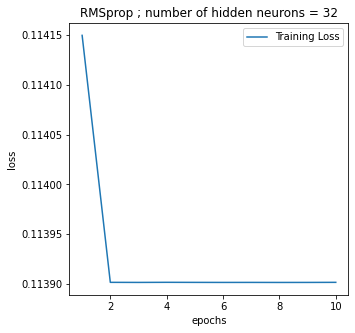



Test Reconstruction Loss: 0.11280278861522675


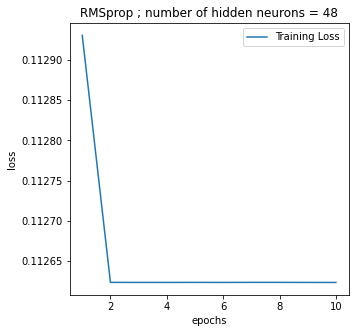



Test Reconstruction Loss: 0.11426842212677002


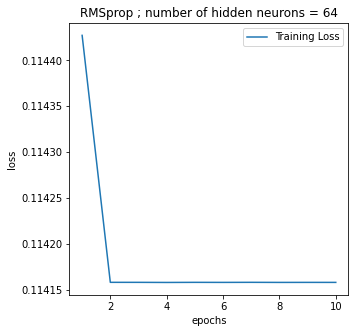



Test Reconstruction Loss: 0.031922079622745514


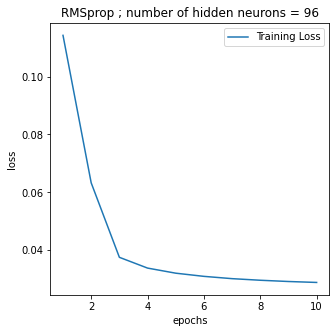

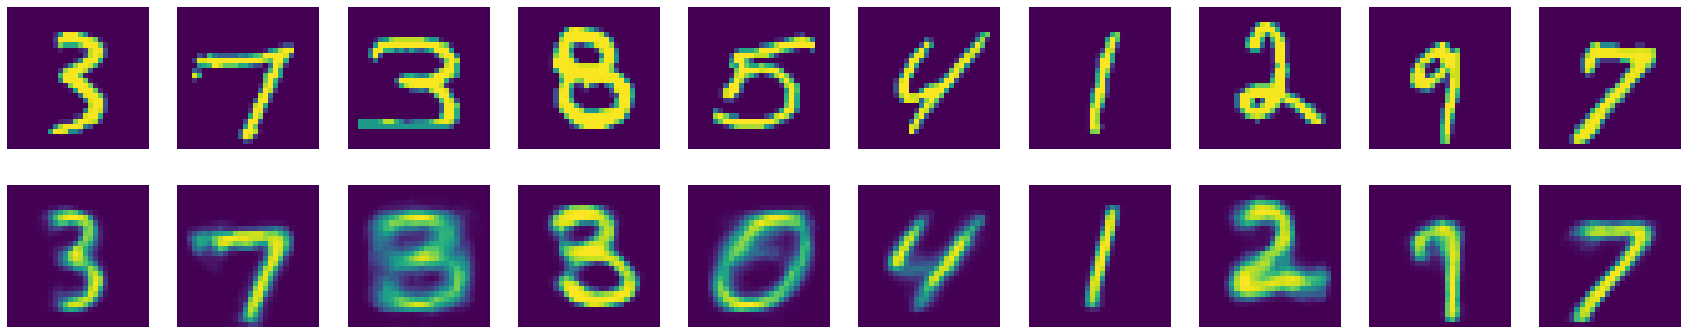

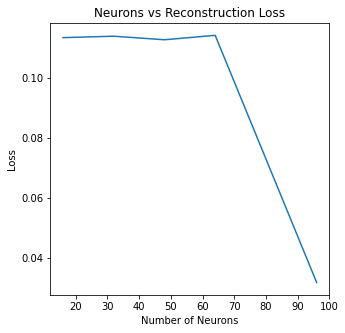

In [ ]:
keras.backend.clear_session()

loss='mean_squared_error'
optim=optimizers.RMSprop(learning_rate=0.01)

batchSize=128
epochs=10
reconLoss=[]

for codeDim in codeDimList:
  ae=autoencoder(codeDim)
  ae.compileFunc(loss, optim)
  history=ae.fit(xTrain, xTest, batchSize, epochs)
  reconLoss.append(plotAccLoss(history, epochs, codeDim, 'RMSprop'))

ae.plotReconstructed(xTest)
plotLossVsNeurons(codeDimList, reconLoss)

## PCA Decomposition

In [6]:
from sklearn import decomposition
estimator = decomposition.PCA(n_components=50, svd_solver='randomized', whiten=True)
reconstructedImgs = estimator.inverse_transform(estimator.fit_transform(xTrain))

In [7]:
reconstructedImgs = estimator.inverse_transform(estimator.transform(xTest))

In [8]:
loss = np.mean((xTest - reconstructedImgs) ** 2)
print("Reconstruction Error: ", loss)

Reconstruction Error:  0.011772946


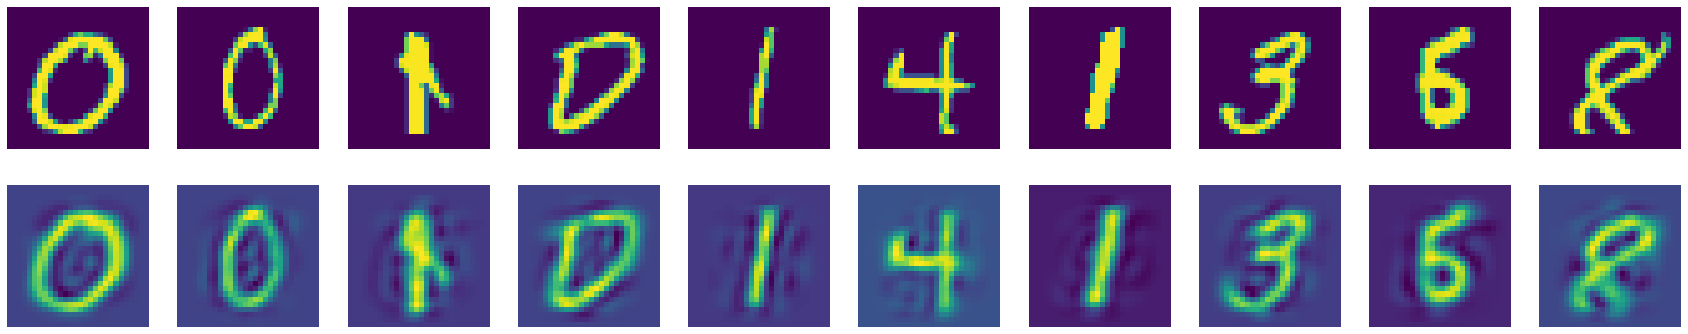

In [9]:
n=10
indices = np.random.choice(np.shape(xTest)[0], n, replace=False)
plt.figure(figsize=(30,6))
for i in range(n):
  plt.subplot(2,n,i+1)
  plt.imshow(xTest[i].reshape(28,28))
  plt.axis('off')

  plt.subplot(2,n,i+1+n)
  plt.imshow(reconstructedImgs[i].reshape(28,28))
  plt.axis('off')

plt.show()


### Test Reconstruction Loss

---
|                       | MSE     | Neurons|
| :---                  | :----:  | ----:  |
| **Adam**              | 0.0152  | 64     |
| **RMS Prop**          | 0.0154  | 96     |
| **SGD with momentum** | 0.0106  | 96     |
| **SGD w/o momentum**  | 0.0343  | 96     |
| **PCA Decomposition** | 0.012   | -      |
